<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [65]:
model = tf.keras.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))


    # tf.keras.layers.Flatten(input_shape=(28, 28)), , kernel_regularizer=regularizers.l2(0.001)
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(10)


In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(train_images, train_labels, epochs=20, batch_size=512, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/20
118/118 [==============================] - 3s 17ms/step - loss: 1.3815 - accuracy: 0.5491 - val_loss: 0.6727 - val_accuracy: 0.7711
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.7719 - accuracy: 0.7507 - val_loss: 0.5479 - val_accuracy: 0.8173
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.6495 - accuracy: 0.7910 - val_loss: 0.5075 - val_accuracy: 0.8306
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.6000 - accuracy: 0.8108 - val_loss: 0.4872 - val_accuracy: 0.8370
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.5684 - accuracy: 0.8180 - val_loss: 0.4742 - val_accuracy: 0.8385
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.5449 - accuracy: 0.8273 - val_loss: 0.4525 - val_accuracy: 0.8495
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.5254 - accuracy: 0.8338 - val_loss: 0.4471 - val_accuracy: 0.8513

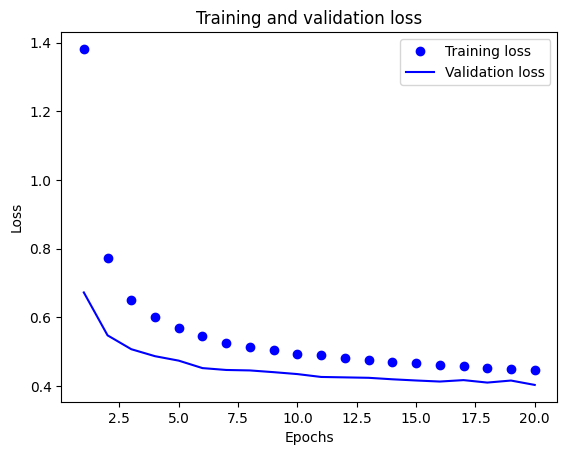

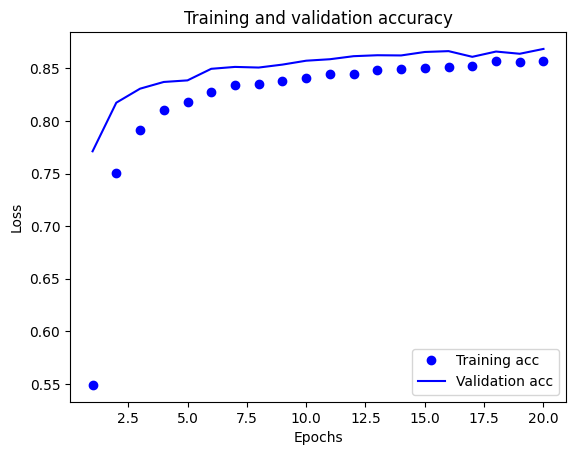

In [68]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()